In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
t_0 = 0.
T = 2.
x_0 = 1.
n = 10
def f(t,x):
  return -2.*(x-np.cos(t))-np.sin(t)

#real solution
def g(t):
  return np.cos(t) 

In [9]:
def EULER(R, n, f, t_0, T, x_0):
    h = 2./n
    R[0]=[t_0,x_0]
    for i in range (1,n+1):
      R[i]=[t_0 + i*h,R[i-1][1]+h*f(R[i-1][0]+h/2,R[i-1][1]+h/2*f(R[i-1][0],R[i-1][1]))]
    
def EULER_ERROR(n, f, g, t_0, T, x_0):
    e = np.empty(n)
    for i in range(n):
        R = np.empty(shape=(5*(2**(i+1))+1,2))
        EULER(R,5*(2**(i+1)), f, t_0, T, x_0)
        e[i]=np.abs(R[5*(2**(i+1))][1]-g(T))
    return e

In [4]:
R = np.empty(shape=(n+1,2)) # list of nods with numerical solutions in these points
EULER(R, n, f, t_0, T, x_0)
R

array([[ 0.        ,  1.        ],
       [ 0.2       ,  0.97803498],
       [ 0.4       ,  0.91763579],
       [ 0.6       ,  0.82103211],
       [ 0.8       ,  0.69195402],
       [ 1.        ,  0.53546505],
       [ 1.2       ,  0.35774786],
       [ 1.4       ,  0.16584938],
       [ 1.6       , -0.03260592],
       [ 1.8       , -0.22972388],
       [ 2.        , -0.41765801]])

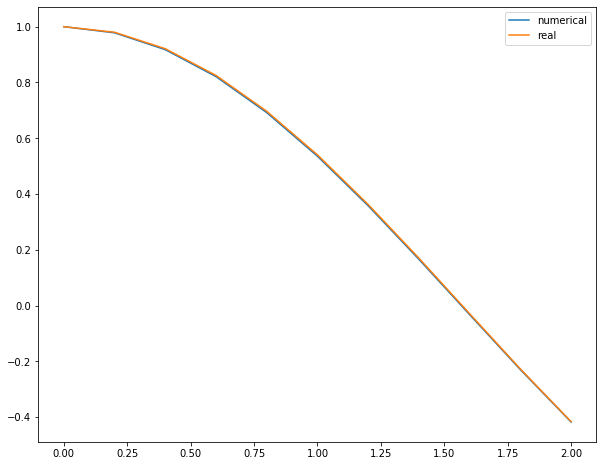

In [5]:
# zipping above values to be able to plot them along with the real solution
x,y = zip(*R)
plt.figure(figsize=(10,8))
plt.plot(x, y, label='numerical')
plt.plot(x, g(x), label='real')
plt.legend()

In [13]:
E = EULER_ERROR(n, f, g, t_0, T, x_0)
E

array([1.51117186e-03, 2.77768053e-04, 5.99481010e-05, 1.39484320e-05,
       3.36552193e-06, 8.26668245e-07, 2.04857549e-07, 5.09900170e-08,
       1.27195708e-08, 3.17640875e-09])

In [14]:
def HEUN(R, n, f, t_0, T, x_0):
    h = 2./n
    R[0]=[t_0,x_0]
    for i in range (1,n+1):
      R[i]=[t_0 + i*h,R[i-1][1]+0.5*h*f(R[i-1][0],R[i-1][1])+0.5*h*f(R[i-1][0]+h,R[i-1][1]+h*f(R[i-1][0],R[i-1][1]))]
    
def HEUN_ERROR(n, f, g, t_0, T, x_0):
    e = np.empty(n)
    for i in range(n):
        R = np.empty(shape=(5*(2**(i+1))+1,2))
        HEUN(R,5*(2**(i+1)), f, t_0, T, x_0)
        e[i]=np.abs(R[5*(2**(i+1))][1]-g(T))
    return e

In [15]:
P = np.empty(shape=(n+1,2))
HEUN(P, n, f, t_0, T, x_0)
P

array([[ 0.        ,  1.        ],
       [ 0.2       ,  0.97614638],
       [ 0.4       ,  0.91473773],
       [ 0.6       ,  0.81778675],
       [ 0.8       ,  0.68886245],
       [ 1.        ,  0.53290327],
       [ 1.2       ,  0.35598988],
       [ 1.4       ,  0.16508216],
       [ 1.6       , -0.03227232],
       [ 1.8       , -0.22824872],
       [ 2.        , -0.41506335]])

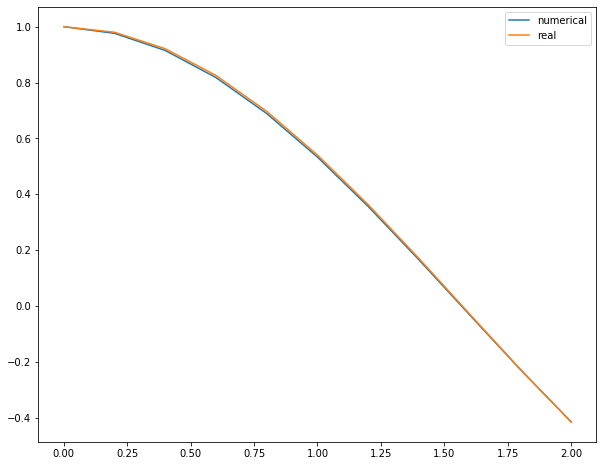

In [16]:
x,y = zip(*P)
plt.figure(figsize=(10,8))
plt.plot(x, y, label='numerical')
plt.plot(x, g(x), label='real')
plt.legend()

In [18]:
H = HEUN_ERROR(n, f, g, t_0, T, x_0)
H

array([1.08348793e-03, 3.19609734e-04, 8.26269514e-05, 2.08440493e-05,
       5.22625335e-06, 1.30799660e-06, 3.27149964e-07, 8.18046057e-08,
       2.04531839e-08, 5.11354248e-09])